In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics as sg


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv('../data/ts.csv', index_col=0, parse_dates=True)
df.shape, df.columns

((43, 11),
 Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
        'bezrobocie', 'spr_detaliczna', 'pkb'],
       dtype='object'))

In [29]:
predictors = ['inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
        'bezrobocie', 'spr_detaliczna', 'pkb']
outcome = 'rynek'

model = LinearRegression()
model.fit(X=df[predictors], y=df[outcome])

print(f'Wyraz wolny: {model.intercept_:.3f}')
print('Współczynniki:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')

Wyraz wolny: 25251.903
Współczynniki:
 inflacja_r: -390.8389297401953
 inflacja_q: -74.40959040455832
 stopa_procentowa: 54327.748869002884
 liczba_kredytow: 0.048004681676857786
 tempo_wzrostu: 389.9758452974592
 ufnosc: -150.1143164917448
 duze_zakupy: 41.567876124235084
 bezrobocie: -585.0390103142009
 spr_detaliczna: -45.10405740421934
 pkb: -72.88526443118622


In [31]:
fitted = model.predict(df[predictors])
RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))
r2 = r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 582
r2: 0.9486


In [32]:
model = sm.OLS(df[outcome], df[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  rynek   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     59.10
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           9.33e-18
Time:                        19:57:58   Log-Likelihood:                -334.76
No. Observations:                  43   AIC:                             691.5
Df Residuals:                      32   BIC:                             710.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
inflacja_r        -390.8389     80.333  

In [33]:
y = df[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(df[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(df[variables]), model)

best_model, best_variables = stepwise_selection(df.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Wyraz wolny: {best_model.intercept_:.3f}')
print('Współczynniki:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: rynek, inflacja_r, inflacja_q, stopa_procentowa, liczba_kredytow, tempo_wzrostu, ufnosc, duze_zakupy, bezrobocie, spr_detaliczna, pkb
Start: score=801.17, constant
Step: score=-2289.31, add rynek


ValueError: math domain error

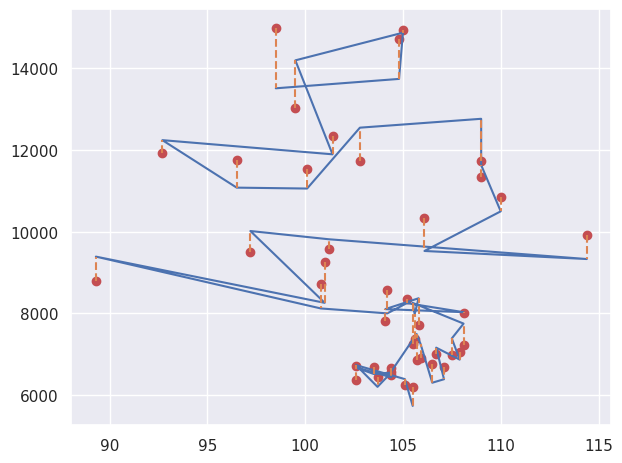

In [28]:
col_num = 8
s1, s2 = df[predictors[col_num]], df[outcome]
plt.title = predictors[col_num]
plt.scatter(x=s1.values, y=s2.values, c='r')
plt.plot(s1, fitted)
for x, yactual, yfitted in zip(s1, s2, fitted): 
    plt.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()